# Imports

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf
import random

%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Setup

In [2]:
import gym
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
state = env.reset()

In [4]:
state

array([-0.02438068,  0.00966612, -0.02262983,  0.04579649])

In [5]:
pos, vel, ang, ang_vel = state
print(pos)
print(vel)
print(ang)
print(ang_vel)

-0.02438068309783762
0.009666116532243939
-0.022629834203987
0.045796485388198915


In [6]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, state):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = state
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, state):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, state)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


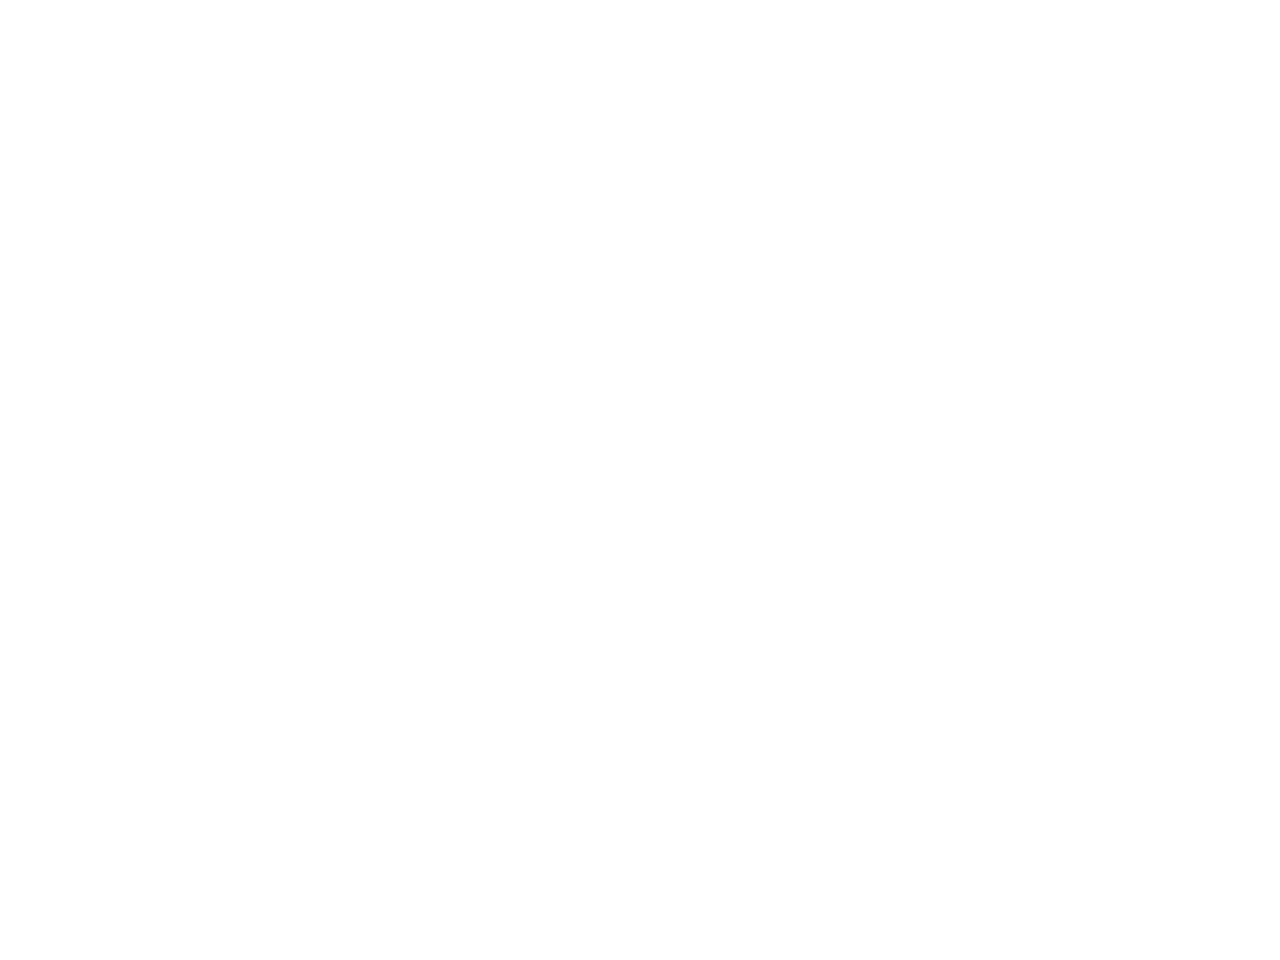

In [7]:
plot_cart_pole(env, state);

# Experimentation

In [8]:
env.action_space

Discrete(2)

In [9]:
env.observation_space

Box(4,)

## Take 1 step right

[-0.03014973  0.18498551 -0.04805497 -0.32197662]
1.0
False


<IPython.core.display.Javascript object>


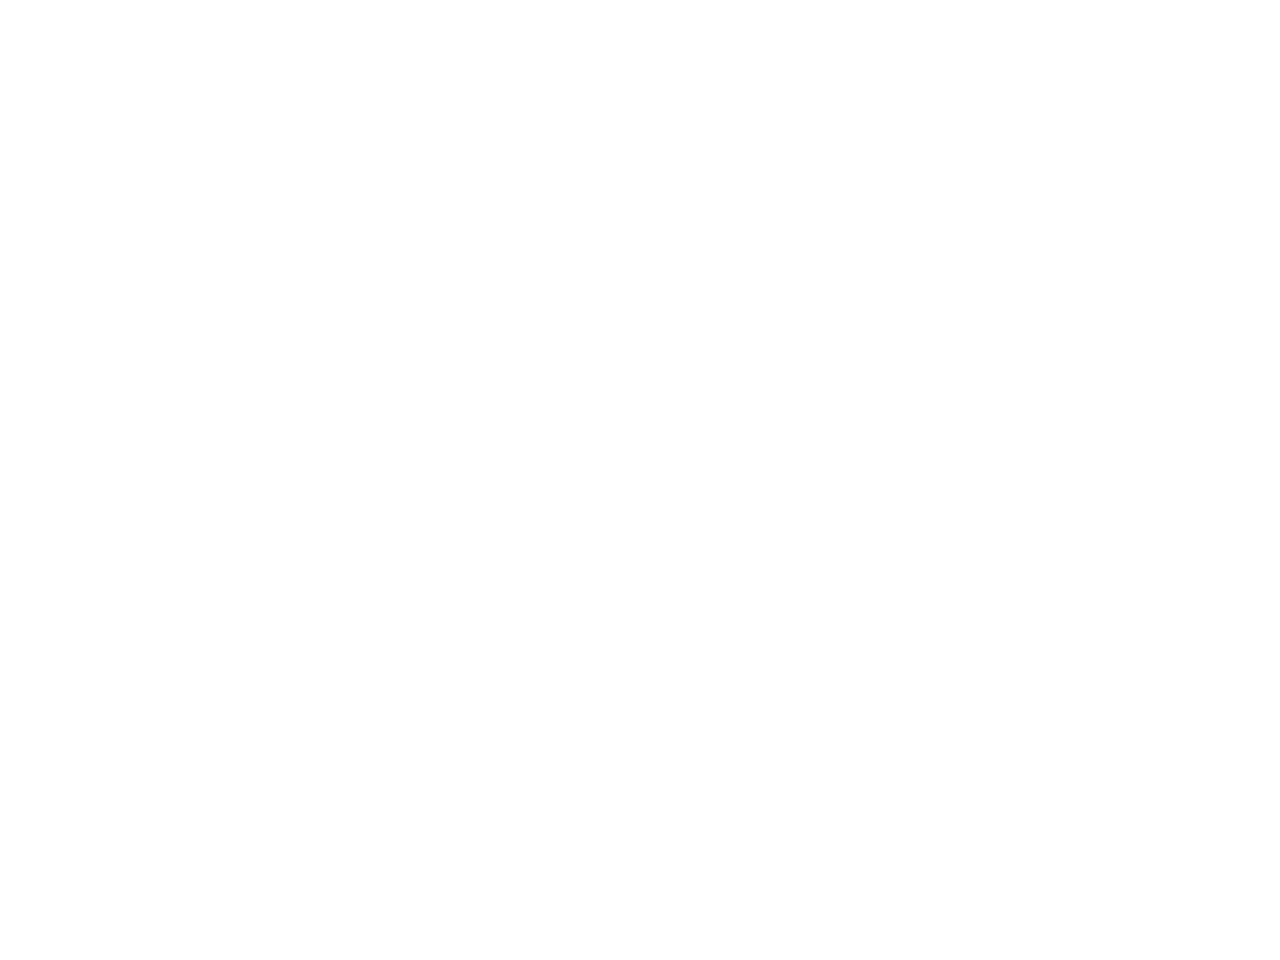

(-0.5, 599.5, 399.5, -0.5)

In [10]:
state = env.reset()
state, reward, done, info = env.step(1)
print(state)
print(reward)
print(done)

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

## Take 1 step left

[ 0.02960139 -0.174022   -0.00205422  0.25199389]
1.0
False


<IPython.core.display.Javascript object>


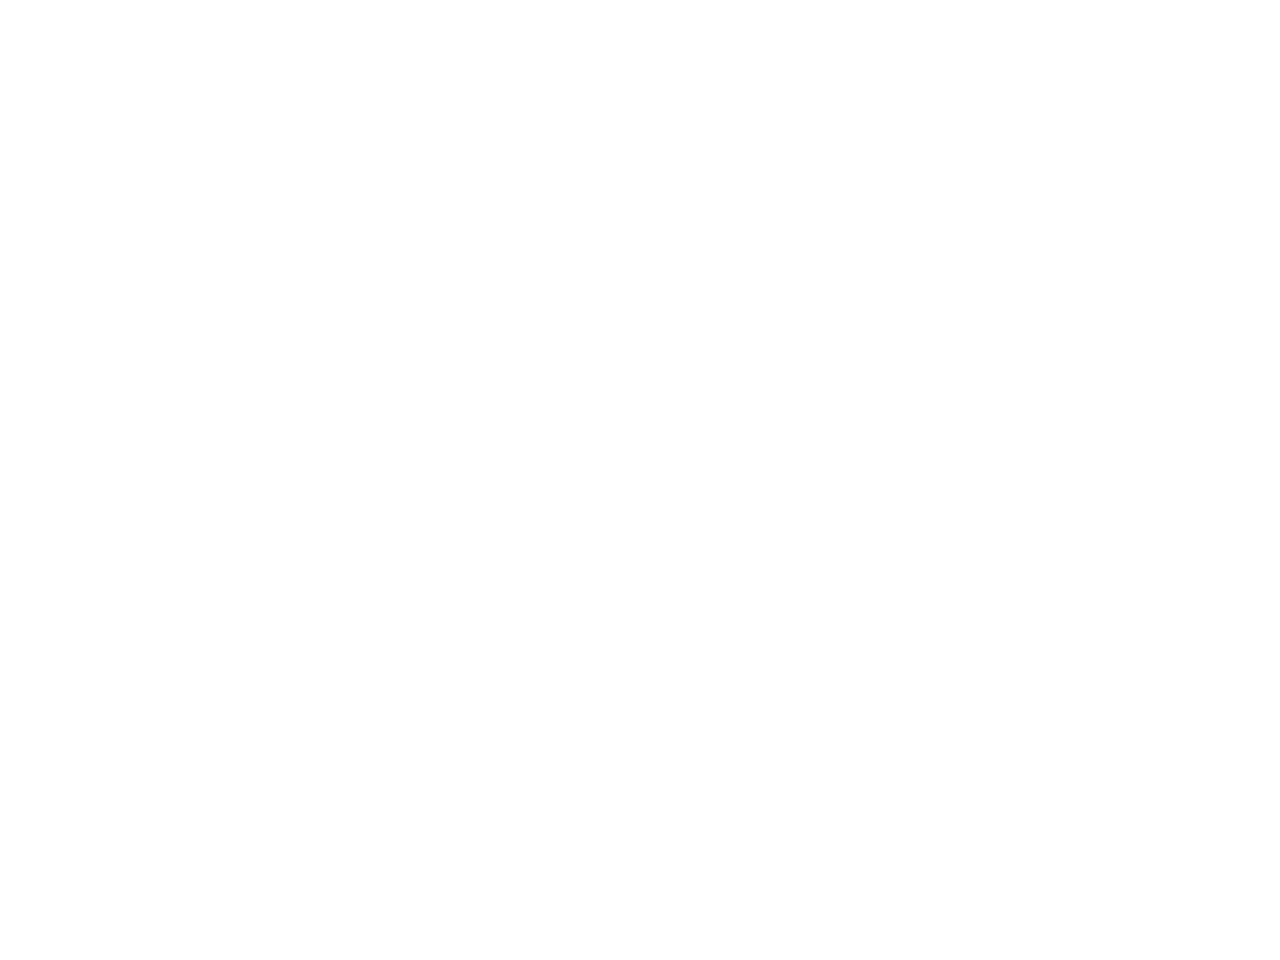

(-0.5, 599.5, 399.5, -0.5)

In [11]:
state = env.reset()
state, reward, done, info = env.step(0)
print(state)
print(reward)
print(done)

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

## Keep going left until fall

[-0.03055576 -0.14977811 -0.02450441  0.2628806 ]
[-0.03355132 -0.34454187 -0.0192468   0.54773496]
[-0.04044216 -0.53938821 -0.0082921   0.83429213]
[-0.05122992 -0.7343959   0.00839374  1.12435575]
[-0.06591784 -0.92962686  0.03088086  1.41965961]
[-0.08451038 -1.12511706  0.05927405  1.72183263]
[-0.10701272 -1.32086549  0.0937107   2.03235599]
[-0.13343003 -1.51682091  0.13435782  2.35251009]
[-0.16376645 -1.71286599  0.18140802  2.6833099 ]
[-0.19802377 -1.90879892  0.23507422  3.0254285 ]


<IPython.core.display.Javascript object>


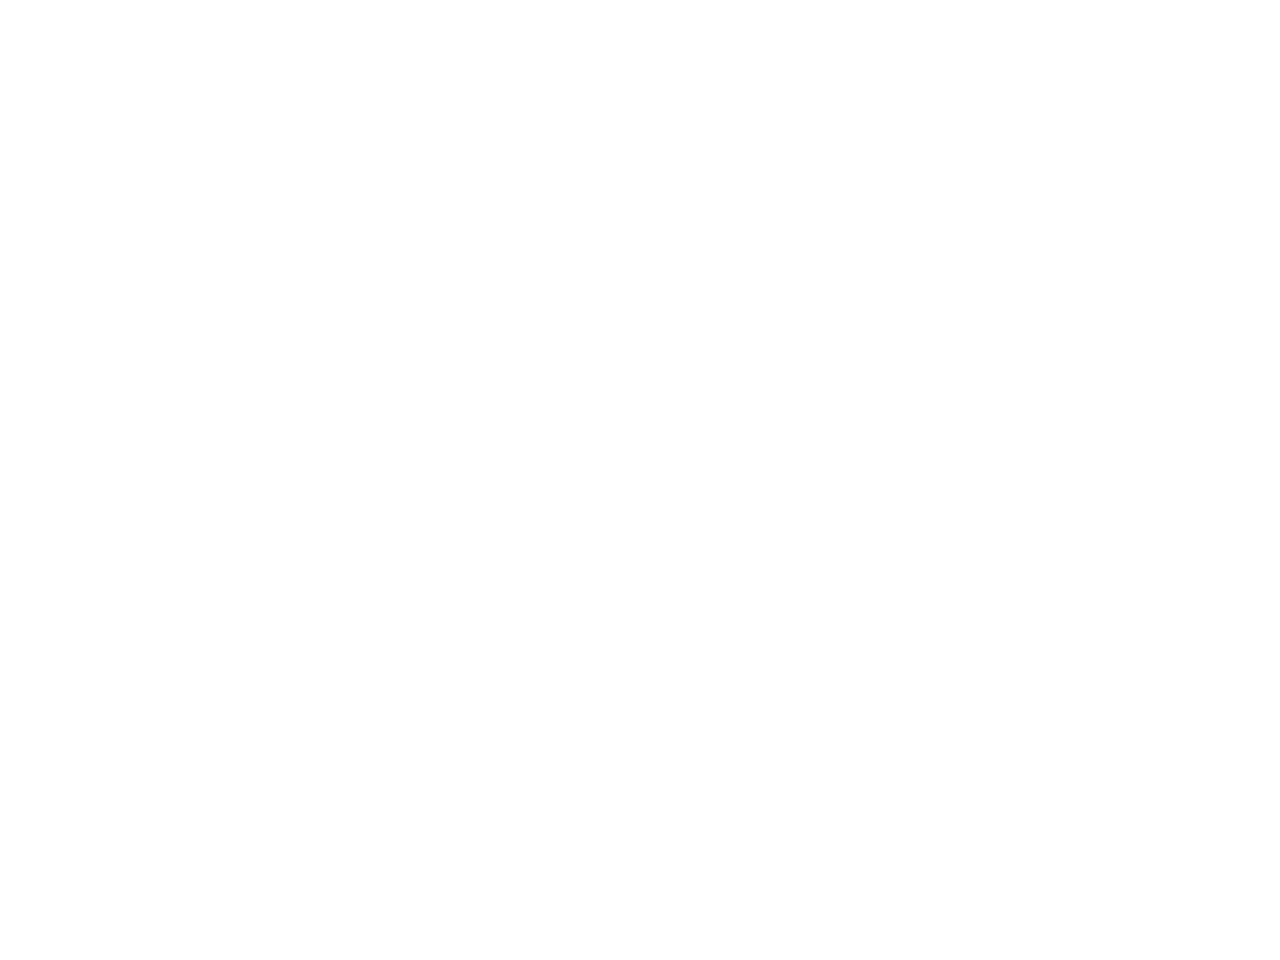

(-0.5, 599.5, 399.5, -0.5)

In [12]:
state = env.reset()
while True:
    state, reward, done, info = env.step(0)
    print(state)
    if done:
        break

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

## Keep going right until fall

[ 0.04114276  0.18211658  0.03000647 -0.29151202]
[ 0.04478509  0.37679811  0.02417623 -0.57458229]
[ 0.05232105  0.57157294  0.01268458 -0.85955203]
[ 0.06375251  0.76651984 -0.00450646 -1.14821969]
[ 0.07908291  0.96170033 -0.02747085 -1.44231235]
[ 0.09831692  1.15714952 -0.0563171  -1.74345093]
[ 0.12145991  1.35286514 -0.09118612 -2.05310742]
[ 0.14851721  1.54879425 -0.13224826 -2.37255165]
[ 0.17949309  1.74481725 -0.1796993  -2.70278637]
[ 0.21438944  1.94072947 -0.23375502 -3.0444704 ]


<IPython.core.display.Javascript object>


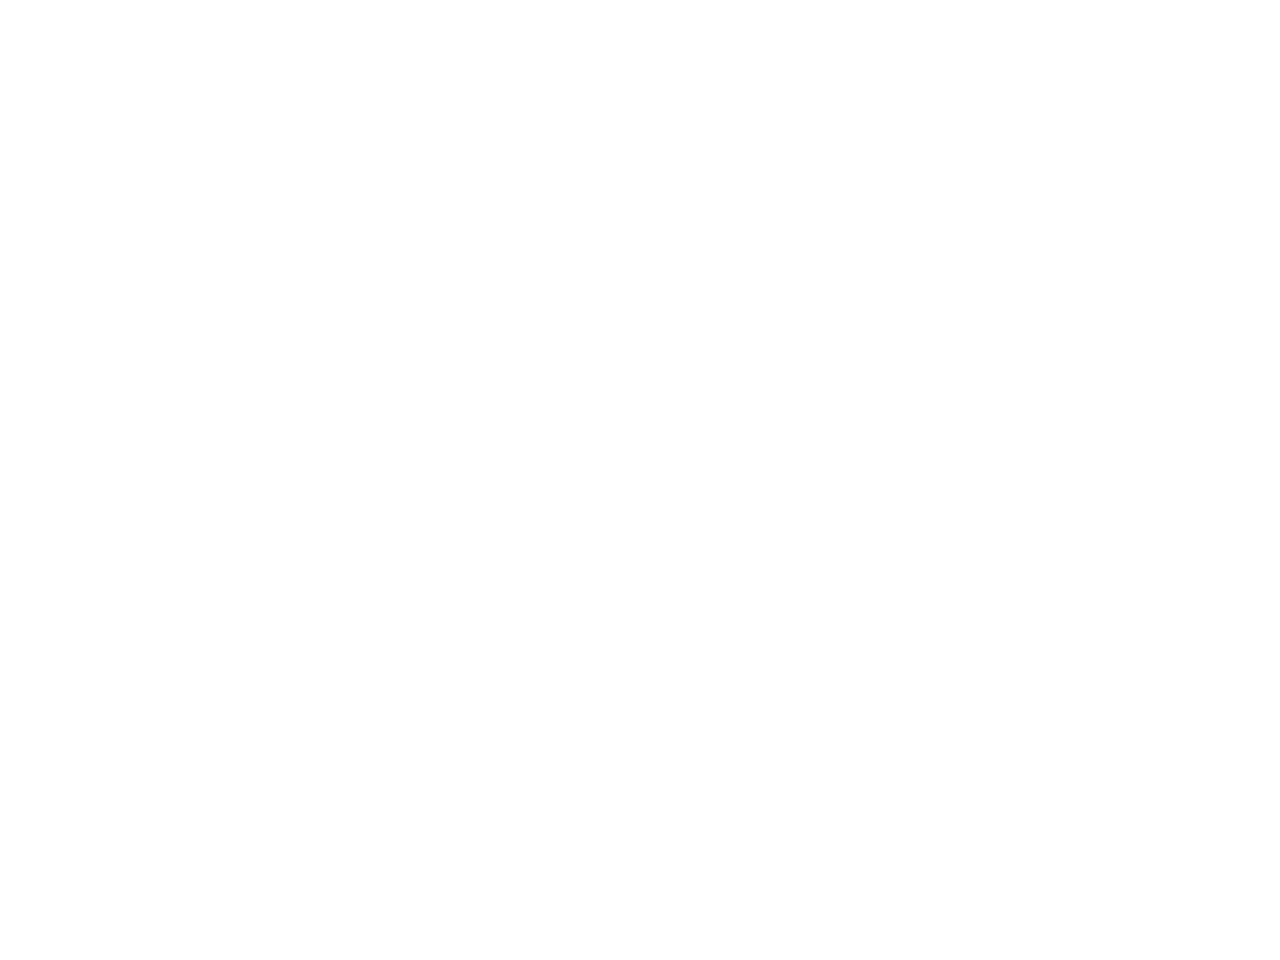

(-0.5, 599.5, 399.5, -0.5)

In [13]:
state = env.reset()
while True:
    state, reward, done, info = env.step(1)
    print(state)
    if done:
        break

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

# Improve Cart-Pole

## Animation functions

In [14]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

## Custom Policy
1. if angle and angular_velocity are both <0, then it is definitely failling left => move left to balance
2. if angle and angular_velocity are both >0, then it is definitely failling right => move right to balance
3. if above are both false => just move random for 1 step

In [15]:
def custom_policy(state, env):
    ang = state[2]
    ang_vel = state[3]
    if ang<0 and ang_vel<0: # falling left => move left
        return 0
    if ang>0 and ang_vel>0: # falling right => move right
        return 1    
    return env.action_space.sample() # play randomly

In [16]:
print(env._max_episode_steps)

200


In [17]:
def run_policy(num_of_episodes, max_steps=None):
    if max_steps is not None:
        env._max_episode_steps = max_steps
    print("Max episode steps:", env._max_episode_steps)
    frames = []
    rewards = []
    for episode in range(num_of_episodes):
        episode_reward = 0
        state = env.reset()
        for step in range(env._max_episode_steps):
            if episode==0: # check out 1 animation
                img = render_cart_pole(env, state)
                frames.append(img)

            action = custom_policy(state, env)
            state, reward, done, info = env.step(action)        
            episode_reward += reward
            if done:            
                break
        rewards.append(episode_reward)
        print(episode, episode_reward)
    return rewards, frames

### Try with the definition of `solved` as per the docs – 100 consecutive trials with default max_episode_steps

In [18]:
rewards, frames = run_policy(100)

Max episode steps: 200
0 200.0
1 200.0
2 200.0
3 200.0
4 200.0
5 200.0
6 200.0
7 200.0
8 200.0
9 200.0
10 200.0
11 200.0
12 200.0
13 200.0
14 200.0
15 200.0
16 200.0
17 200.0
18 200.0
19 200.0
20 200.0
21 200.0
22 200.0
23 200.0
24 200.0
25 200.0
26 200.0
27 200.0
28 200.0
29 200.0
30 200.0
31 200.0
32 200.0
33 200.0
34 200.0
35 200.0
36 200.0
37 200.0
38 200.0
39 200.0
40 200.0
41 200.0
42 200.0
43 200.0
44 200.0
45 200.0
46 200.0
47 200.0
48 200.0
49 200.0
50 200.0
51 200.0
52 200.0
53 200.0
54 200.0
55 200.0
56 200.0
57 200.0
58 200.0
59 200.0
60 200.0
61 200.0
62 200.0
63 200.0
64 200.0
65 200.0
66 200.0
67 200.0
68 200.0
69 200.0
70 200.0
71 200.0
72 200.0
73 200.0
74 200.0
75 200.0
76 200.0
77 200.0
78 200.0
79 200.0
80 200.0
81 200.0
82 200.0
83 200.0
84 200.0
85 200.0
86 200.0
87 200.0
88 200.0
89 200.0
90 200.0
91 200.0
92 200.0
93 200.0
94 200.0
95 200.0
96 200.0
97 200.0
98 200.0
99 200.0


In [19]:
np.mean(rewards), np.std(rewards), np.min(rewards), np.max(rewards)

(200.0, 0.0, 200.0, 200.0)

<IPython.core.display.Javascript object>


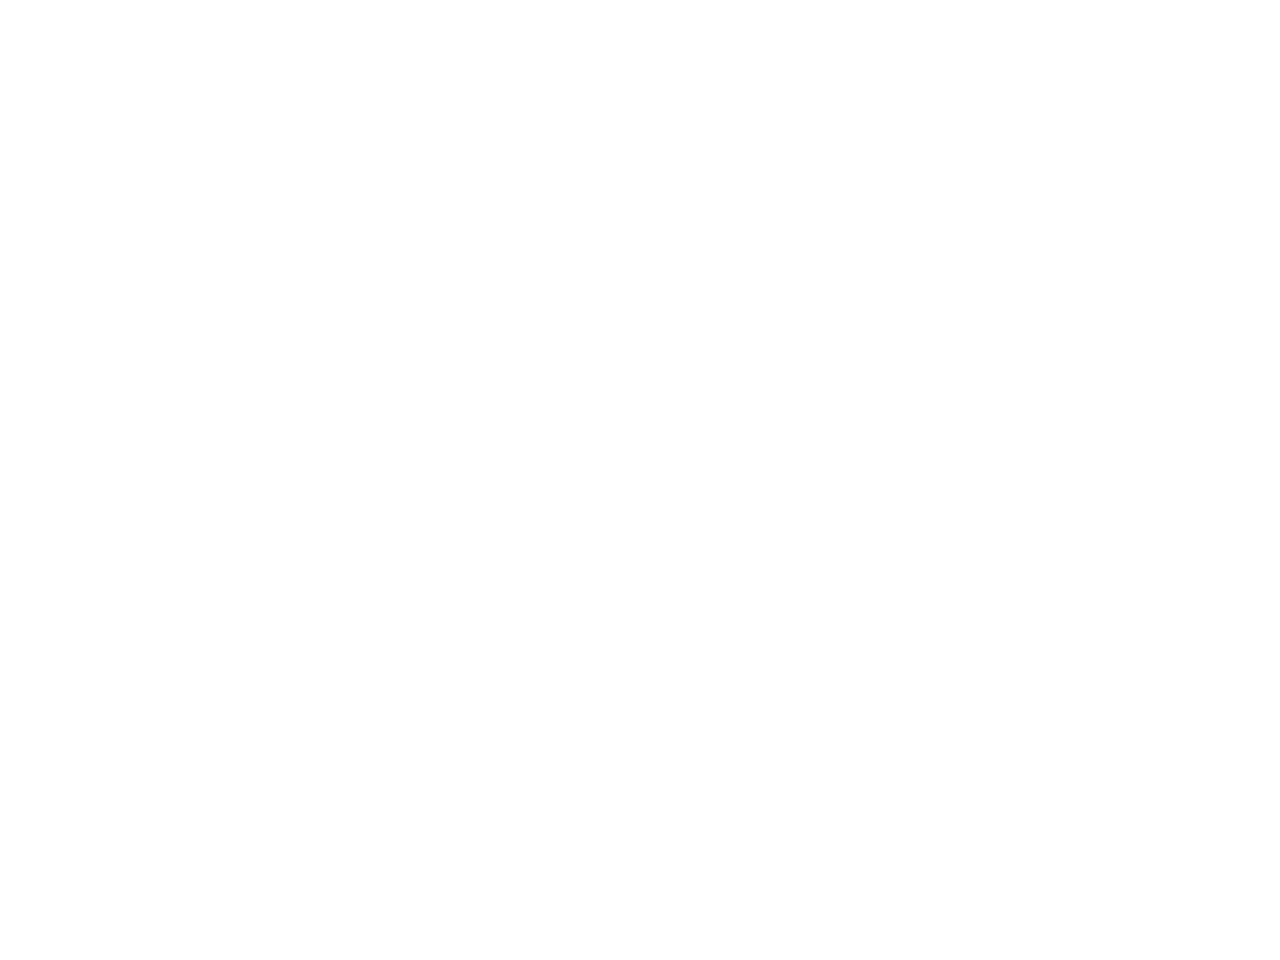

In [20]:
video = plot_animation(frames)
plt.show()

### Try with 100 consecutive trials with max_episode_steps as 1000

In [21]:
rewards, frames = run_policy(100, 1000)

Max episode steps: 1000
0 960.0
1 1000.0
2 690.0
3 200.0
4 474.0
5 1000.0
6 1000.0
7 586.0
8 595.0
9 611.0
10 436.0
11 803.0
12 474.0
13 607.0
14 754.0
15 577.0
16 607.0
17 522.0
18 580.0
19 1000.0
20 679.0
21 719.0
22 613.0
23 478.0
24 708.0
25 502.0
26 351.0
27 1000.0
28 568.0
29 761.0
30 552.0
31 433.0
32 1000.0
33 300.0
34 411.0
35 250.0
36 279.0
37 804.0
38 502.0
39 362.0
40 778.0
41 364.0
42 1000.0
43 445.0
44 426.0
45 349.0
46 338.0
47 569.0
48 1000.0
49 793.0
50 783.0
51 795.0
52 391.0
53 887.0
54 285.0
55 534.0
56 1000.0
57 662.0
58 379.0
59 338.0
60 369.0
61 430.0
62 741.0
63 574.0
64 820.0
65 1000.0
66 723.0
67 1000.0
68 412.0
69 685.0
70 536.0
71 354.0
72 552.0
73 1000.0
74 256.0
75 355.0
76 736.0
77 748.0
78 642.0
79 1000.0
80 697.0
81 718.0
82 603.0
83 849.0
84 234.0
85 420.0
86 518.0
87 359.0
88 523.0
89 351.0
90 346.0
91 499.0
92 756.0
93 462.0
94 432.0
95 519.0
96 283.0
97 379.0
98 546.0
99 395.0


In [22]:
np.mean(rewards), np.std(rewards), np.min(rewards), np.max(rewards)

(596.86, 225.935434139933, 200.0, 1000.0)

<IPython.core.display.Javascript object>


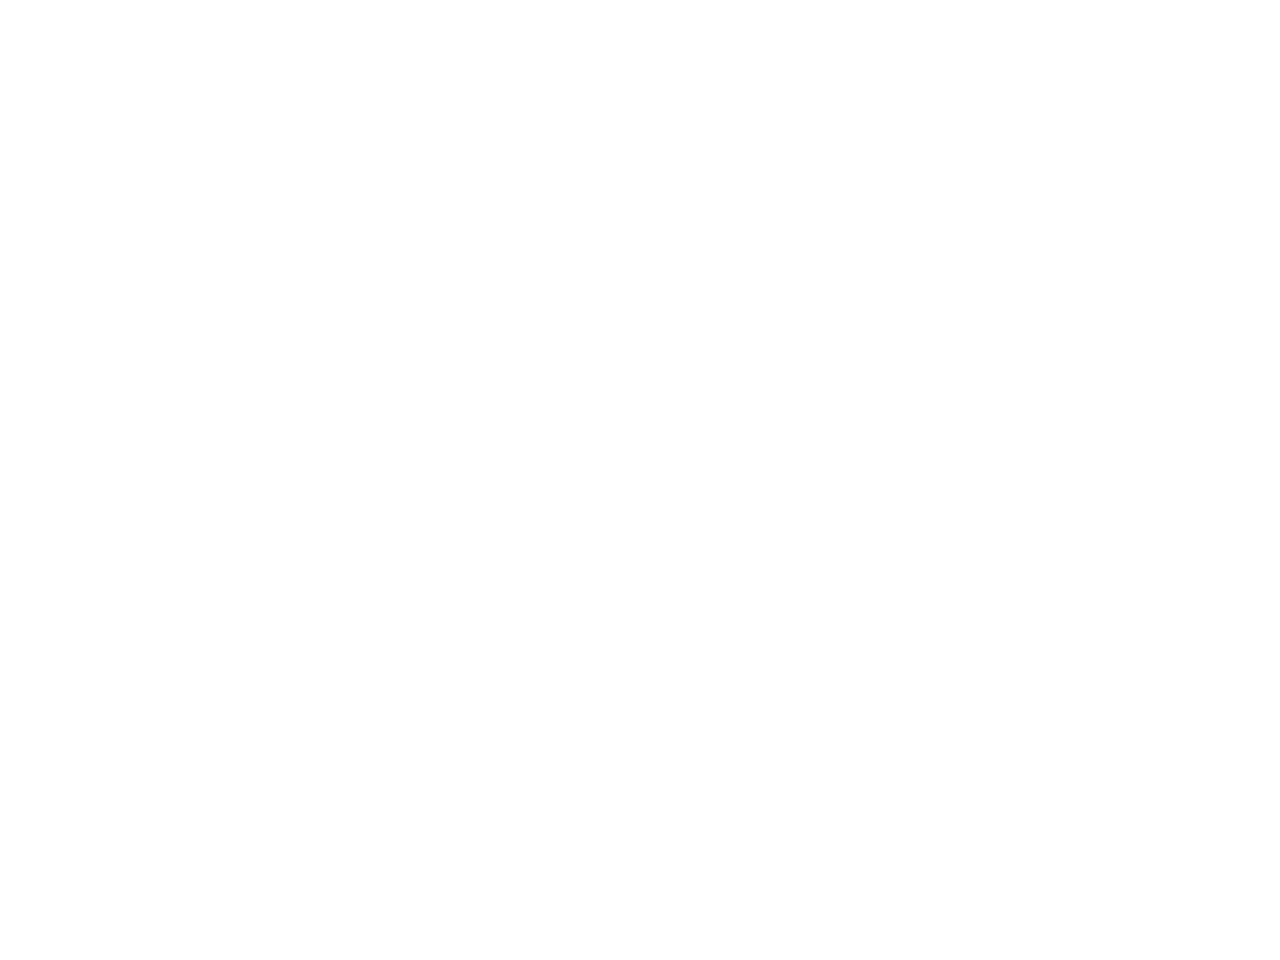

In [23]:
video = plot_animation(frames)
plt.show()

# Solve using Q-Learning

In [24]:
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [25]:
env.action_space

Discrete(2)

In [26]:
env.observation_space

Box(4,)

In [27]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [28]:
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

In [29]:
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds

[(-4.8, 4.8),
 (-3.4028235e+38, 3.4028235e+38),
 (-0.41887903, 0.41887903),
 (-3.4028235e+38, 3.4028235e+38)]

In [30]:
# limit the range of velocity just to avoid large numbers (its not playing an important role as we have picked bin_size=1 for it)
state_bounds[1] = (-1.0, 1.0)

# choose the range of angular_velocity same as angle (basically limit the max angle it can turn in 1 sec)
state_bounds[3] = state_bounds[2]

state_bounds

[(-4.8, 4.8),
 (-1.0, 1.0),
 (-0.41887903, 0.41887903),
 (-0.41887903, 0.41887903)]

In [31]:
NUM_BINS = (1, 1, 6, 3) # obtained via GridSearch treating this as a hyperparam

In [32]:
qtable = np.zeros(NUM_BINS + (env.action_space.n,))

In [33]:
state = env.reset()
state

array([-0.00033533, -0.03976108,  0.03283053, -0.04029484])

In [34]:
def state_to_bin(state):
    bin_indexes = []
    for i in range(len(state)):                
        if state[i]<=state_bounds[i][0]:
            bin_index = 0
        elif state[i]>=state_bounds[i][1]:
            bin_index = NUM_BINS[i]-1
        else:
            param_range = state_bounds[i][1] - state_bounds[i][0] # total range from min => max
            # convert the observed param value to be in the scale of (0, max-min) => by subtracting min
            # this helps evaluating bin_index easy (indexes are integers starting from 0)
            param_obs = state[i]-(state_bounds[i][0])
            bin_index = int(param_obs/(param_range/NUM_BINS[i]))
            
        bin_indexes.append(bin_index)
    
    return tuple(bin_indexes)

In [35]:
state_bin = state_to_bin(state)
state_bin

(0, 0, 3, 1)

In [36]:
SOLVED_AVG_STEPS = 195.0
SOLVED_CONSECUTIVE_TRIALS = 100

In [37]:
total_episodes = 1000

min_learning_rate = 0.1
gamma = 1.0

# Exploration parameters
min_epsilon = 0.01

In [38]:
import math
def get_exploration_rate(t):
    return max(min_epsilon, min(1, 1.0 - math.log10((t+1)/25)))

def get_learning_rate(t):
    return max(min_learning_rate, min(0.5, 1.0 - math.log10((t+1)/25)))

In [39]:
qtable = np.zeros(NUM_BINS + (env.action_space.n,))

episode_steps = []
streak = 0

for episode in range(total_episodes):
    if episode%50 == 0:
        print("*"*50)
        print("Episode", episode)
    state = env.reset()
    done = False
    
    epsilon = get_exploration_rate(episode)
    learning_rate = get_learning_rate(episode)    
    
    for step in range(env._max_episode_steps):
        state_bin = state_to_bin(state) # discretize continuous state
        
        # explore or exploit
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample() # random
        else:
            action = np.argmax(qtable[state_bin]) # action with the highest Q-value, for a given state
        
        # take action
        new_state, reward, done, info = env.step(action)
        new_state_bin = state_to_bin(new_state)

        # update Q-table
        qtable[state_bin + (action,)] += learning_rate * (reward + gamma*np.max(qtable[new_state_bin]) - qtable[state_bin + (action,)])
        
        state = new_state
        
        if done:
            if streak == 0 and step > SOLVED_AVG_STEPS:
                episode_steps = []
            episode_steps.append(step)
            break 
            
    if np.mean(episode_steps) >= SOLVED_AVG_STEPS:
        streak += 1
    else:
        streak = 0
        
    if streak >= SOLVED_CONSECUTIVE_TRIALS:
        print("Solved in %d episodes" % episode)
        break

**************************************************
Episode 0
**************************************************
Episode 50
**************************************************
Episode 100
**************************************************
Episode 150
**************************************************
Episode 200
**************************************************
Episode 250
Solved in 253 episodes


## Alternate way of testing the policy

In [40]:
'''
    CartPole-v0 defines "solving" as getting average reward of 195.0 over 100 consecutive trials.
'''

SOLVED_AVG_STEPS = 195.0
SOLVED_CONSECUTIVE_TRIALS = 100

def test_policy():
    episode_steps = []
    for episode in range(SOLVED_CONSECUTIVE_TRIALS):
        state = env.reset()
        done = False
        
        for step in range(env._max_episode_steps):
            state_bin = state_to_bin(state) # discretize continuous state
            action = np.argmax(qtable[state_bin]) # action with the highest Q-value, for a given state
            new_state, reward, done, info = env.step(action)
            state = new_state
            
            if done:                
                episode_steps.append(step)
                break
        
        if np.mean(episode_steps) < SOLVED_AVG_STEPS:            
            return False
        
    return True

In [41]:
qtable = np.zeros(NUM_BINS + (env.action_space.n,))

for episode in range(total_episodes):
    if True:
        print("*"*50)
        print("Episode", episode)
    state = env.reset()
    done = False
    
    epsilon = get_exploration_rate(episode)
    learning_rate = get_learning_rate(episode)    
    
    for step in range(env._max_episode_steps):
        state_bin = state_to_bin(state) # discretize continuous state
        
        # explore or exploit
        if random.uniform(0,1) < epsilon:            
            action = env.action_space.sample() # random
        else:
            action = np.argmax(qtable[state_bin]) # action with the highest Q-value, for a given state
        
        # take action
        new_state, reward, done, info = env.step(action)
        new_state_bin = state_to_bin(new_state)

        # update Q-table
        qtable[state_bin + (action,)] += learning_rate * (reward + gamma*np.max(qtable[new_state_bin]) - qtable[state_bin + (action,)])
        
        state = new_state
        
        if done:
            break
            
    if test_policy():
        print("Solved in %d episodes" % episode)
        break

**************************************************
Episode 0
**************************************************
Episode 1
**************************************************
Episode 2
**************************************************
Episode 3
**************************************************
Episode 4
**************************************************
Episode 5
**************************************************
Episode 6
**************************************************
Episode 7
**************************************************
Episode 8
**************************************************
Episode 9
**************************************************
Episode 10
**************************************************
Episode 11
**************************************************
Episode 12
**************************************************
Episode 13
**************************************************
Episode 14
**************************************************
Episode 15
******************

# Solve using Neural Network Policy

In [42]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [43]:
import tensorflow as tf

# neural network architecture
n_inputs = env.observation_space.shape[0]
n_hidden = 4 # simple enough task, don't need more hidden layers
n_outputs = 1 # will output the probability of accelerating in 1 direction (left)
initializer = tf.contrib.layers.variance_scaling_initializer()

# build the Neural Network
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, 
                         n_hidden, 
                         activation=tf.nn.elu, 
                         kernel_initializer=initializer)
outputs = tf.layers.dense(hidden, 
                          n_outputs, 
                          activation=tf.nn.sigmoid, 
                          kernel_initializer=initializer)

# select a random action based on estimated probabilities
p_left_and_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

init = tf.global_variables_initializer()

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**Randomly initialize and play 1 game and see what the Neural Network does**

(there is no training – so its just going to spit random actions)

In [44]:
frames = []

with tf.Session() as sess:
    init.run()
    obs = env.reset()
    for step in range(env._max_episode_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X:obs.reshape(1, n_inputs)})
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break
    
env.close()

<IPython.core.display.Javascript object>


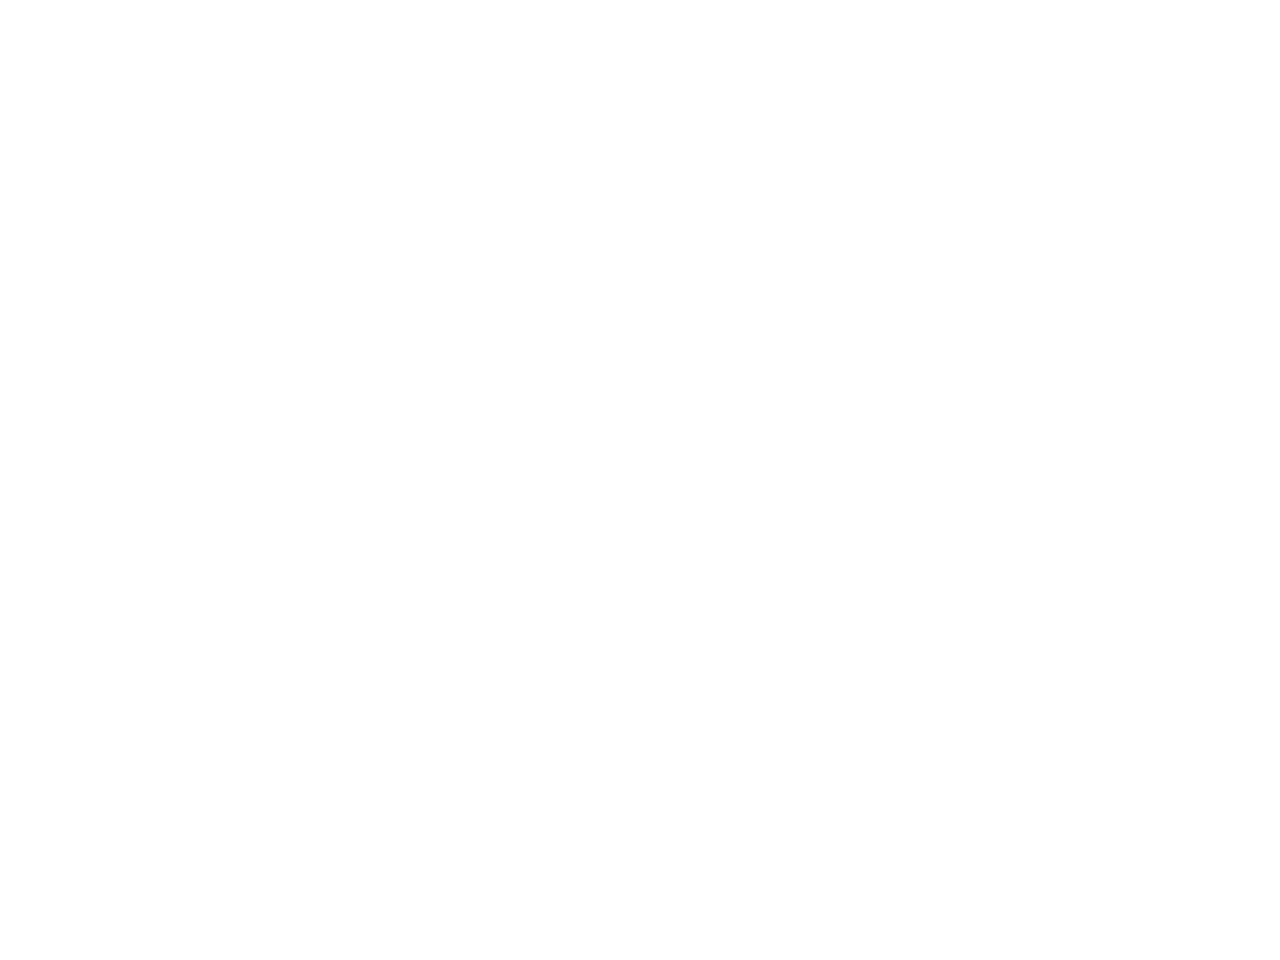

In [45]:
video = plot_animation(frames)
plt.show()

**See if the NN can learn the basic policy of going left if `ang < 0` and going right if `ang > 0`**

In [46]:
reset_graph()

n_inputs = env.observation_space.shape[0]
n_hidden = 4 
n_outputs = 1 
initializer = tf.contrib.layers.variance_scaling_initializer()

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
y = tf.placeholder(tf.float32, shape=[None, n_outputs])

hidden = tf.layers.dense(X, 
                         n_hidden, 
                         activation=tf.nn.elu, 
                         kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits) # probability of action0 (left)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cross_entropy)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

play 10 different environments in parallel, and train for 1000 iterations

In [47]:
n_environments = 10
n_iterations = 1000

envs = [gym.make("CartPole-v0") for _ in range(n_environments)]
observations = [env.reset() for env in envs]

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):        
        # if angle<0, we want proba(left)=1 else proba(left)=0
        target_probas = np.array([([1.] if obs[2]<0 else [0.]) for obs in observations])
        action_val, _ = sess.run([action, training_op], feed_dict={X:np.array(observations), y:target_probas})
        
        for env_index, env in enumerate(envs):
            obs, reward, done, info = env.step(action_val[env_index][0])
            observations[env_index] = obs if not done else env.reset()
    saver.save(sess, "./my_basic_nn_policy.ckpt")

for env in envs:
    env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [48]:
def render_policy_net(model_path, action, X, n_max_steps=env._max_episode_steps):
    frames = []
    env = gym.make("CartPole-v0")
    obs = env.reset()
    with tf.Session() as sess:
        saver.restore(sess, model_path)
        for step in range(n_max_steps):
            img = render_cart_pole(env, obs)
            frames.append(img)
            action_val = action.eval(feed_dict={X:obs.reshape(1, n_inputs)})
            obs, reward, done, info = env.step(action_val[0][0])
            if done:
                print("Steps:", step)
                break
                
    env.close()
    return frames

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
INFO:tensorflow:Restoring parameters from ./my_basic_nn_policy.ckpt
Steps: 52


<IPython.core.display.Javascript object>


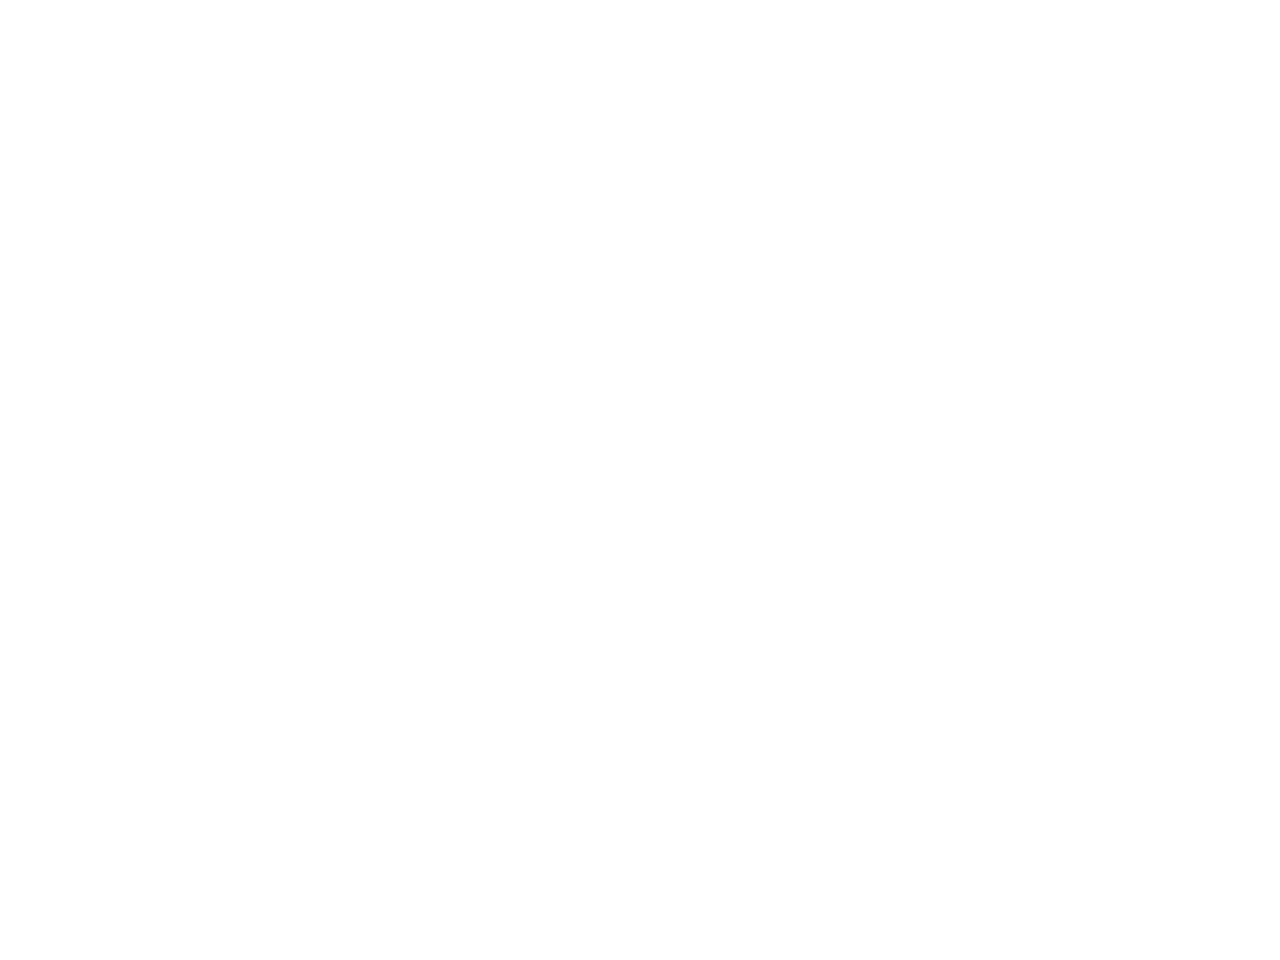

In [49]:
frames = render_policy_net("./my_basic_nn_policy.ckpt", action, X)
video = plot_animation(frames)
plt.show()

**Observation:** Not that bad, now let's see if it can learn a better policy on its own

## Use Policy Gradients

**Use NN to discover an optimal policy (instead of learning a policy provided by us)**

In [50]:
reset_graph()

n_inputs = env.observation_space.shape[0]
n_hidden = 4 
n_outputs = 1 
initializer = tf.contrib.layers.variance_scaling_initializer()

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

hidden = tf.layers.dense(X, 
                         n_hidden, 
                         activation=tf.nn.elu, 
                         kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits) # probability of action0 (left)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

# since we are acting as if the chosen action is the best possible action (and studying the results afterwards)
# the target probability must be 1.0 if the chosen action is action0 (left) and 0.0 if it is action1 (right)
y = 1. - tf.to_float(action)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)

# we ll call compute_gradients() instead of minimize()
# (as we want to tweak the gradients before we apply them)
# (basically, we will know whether the current step was good/bad by doing further steps and reaching end)
grads_and_vars = optimizer.compute_gradients(cross_entropy)

gradients = [grad for grad, var in grads_and_vars] # used later while training

# we need 1 placeholder per gradient_vector (as we want to update them later on by studying the further actions, while training)
gradient_placeholders = []
updated_grads_and_vars = []
for grad, var in grads_and_vars:
    grad_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(grad_placeholder)
    updated_grads_and_vars.append((grad_placeholder, var))

training_op = optimizer.apply_gradients(updated_grads_and_vars)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [51]:
def discount_rewards(rewards, discount_rate):
    discounted_rewards = np.zeros(len(rewards))
    cumulative_reward = 0
    for step in reversed(range(len(rewards))):
        cumulative_reward = rewards[step] + cumulative_reward*discount_rate
        discounted_rewards[step] = cumulative_reward
    return discounted_rewards

In [52]:
# test example
discount_rewards([10, 0, -50], 0.8)

array([-22., -40., -50.])

In [53]:
def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(each-reward_mean)/reward_std for each in all_discounted_rewards]

In [54]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], 0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [58]:
def train_nn_policy_gradients(n_iterations):
    env = gym.make("CartPole-v0")

    n_episodes_per_update = 10 # train the policy evert 10 episodes (don't wait for it to die)
    save_iterations = 10 # save the model every 10 iterations (why?)
    discount_rate = 0.95

    with tf.Session() as sess:
        init.run()
        for iteration in range(n_iterations):
            print("Iteration", iteration)
            all_rewards = [] # raw rewards for all the episodes
            all_gradients = [] # gradients saved at each step of each episode
            for game in range(n_episodes_per_update):
                current_rewards = [] # raw rewards from the current episode
                current_gradients = [] # all gradients from the current episode
                obs = env.reset()            
                for step in range(env._max_episode_steps):
                    action_val, gradients_val = sess.run([action, gradients], feed_dict={X:obs.reshape(1, n_inputs)})
                    obs, reward, done, info = env.step(action_val[0][0])
                    current_rewards.append(reward)
                    current_gradients.append(gradients_val)
                    if done:
                        break
                all_rewards.append(current_rewards)
                all_gradients.append(current_gradients)

            # at this point, we have run the policy for 10 episodes,
            # and we are ready for a policy update (study how we did and update)
            all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate)
            feed_dict = {}
            for var_index, gradient_placeholder in enumerate(gradient_placeholders):
                mean_gradients = np.mean([reward*all_gradients[game_index][step][var_index] 
                                         for game_index, rewards in enumerate(all_rewards)
                                         for step, reward in enumerate(rewards)], axis=0)
                feed_dict[gradient_placeholder] = mean_gradients

            sess.run(training_op, feed_dict=feed_dict)
            if iteration%save_iterations == 0:
                saver.save(sess, "./my_nn_policy_pg.ckpt")

    env.close()

In [59]:
train_nn_policy_gradients(250)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
I

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
INFO:tensorflow:Restoring parameters from ./my_nn_policy_pg.ckpt
Steps: 199


<IPython.core.display.Javascript object>


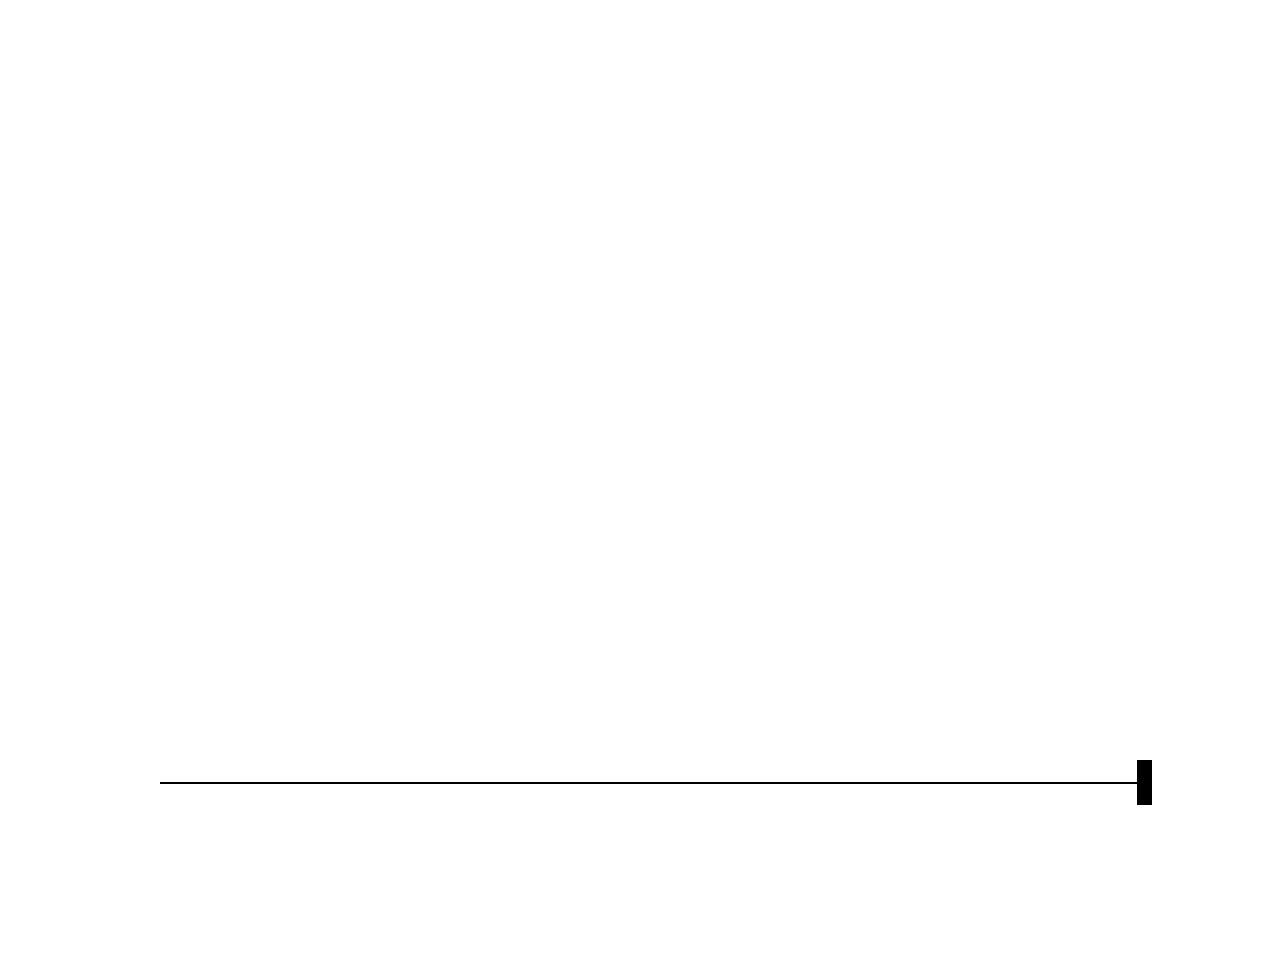

In [60]:
frames = render_policy_net("./my_nn_policy_pg.ckpt", action, X)
video = plot_animation(frames)
plt.show()

**Observation:** the policy was able to learn to balance the pole on the cart – but it is still moving a lot horizontally and risks going off the screen

Let's see what happens with more iterations

In [61]:
train_nn_policy_gradients(500)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
I

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
INFO:tensorflow:Restoring parameters from ./my_nn_policy_pg.ckpt
Steps: 199


<IPython.core.display.Javascript object>


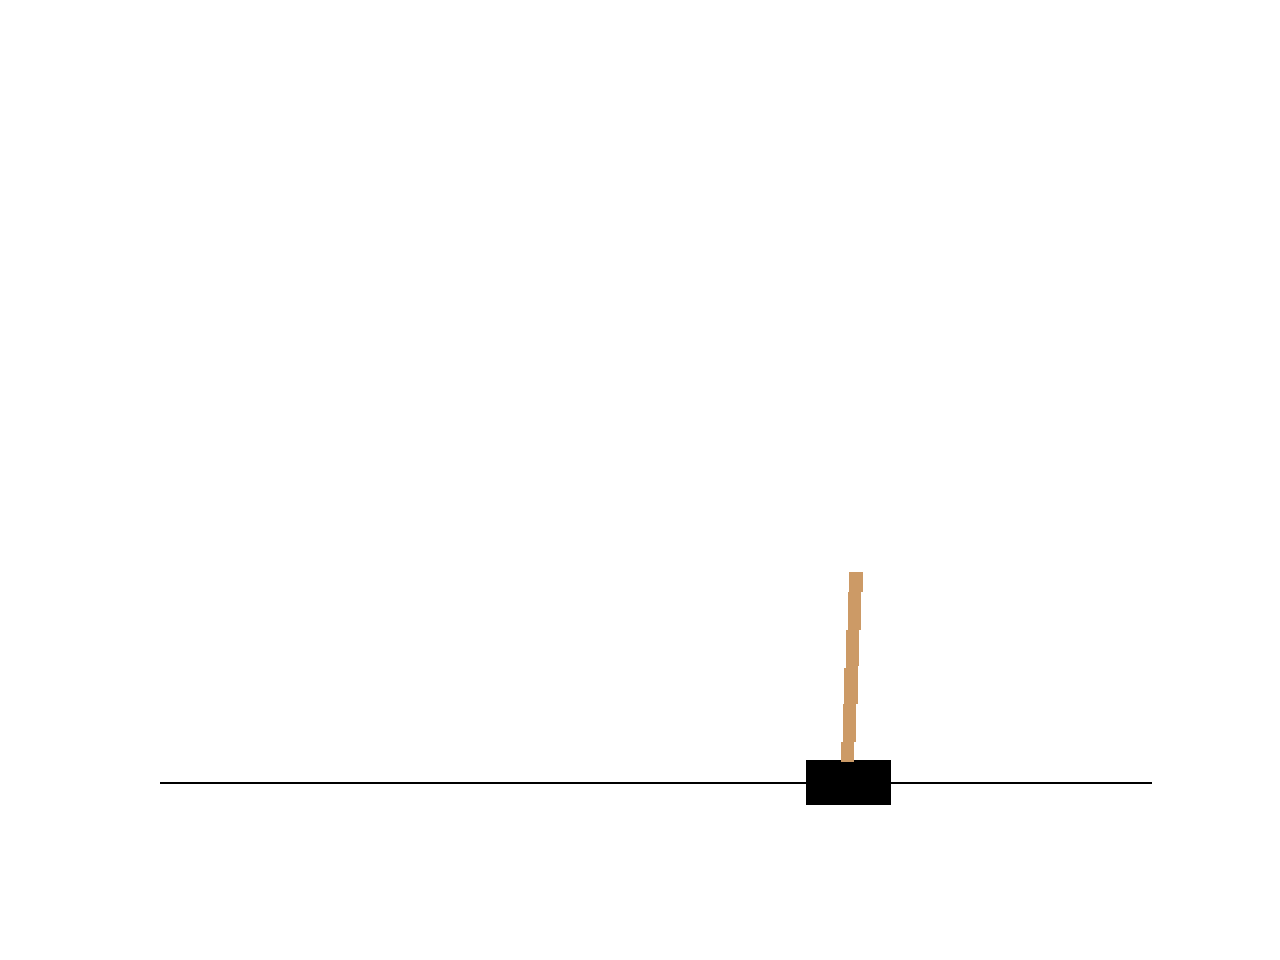

In [62]:
frames = render_policy_net("./my_nn_policy_pg.ckpt", action, X)
video = plot_animation(frames)
plt.show()

**Observation:** bit bitter, stays on the screen more